In [21]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sqlalchemy import create_engine
from sqlalchemy import inspect
from sqlalchemy import text
import os
import geopandas as gpd

In [22]:
host = 'localhost'
database = 'spatial'
user = 'postgres'
port = '5432'
password = os.getenv('SQL_PASSWORD')

In [23]:
connection_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"

engine = create_engine(connection_string)
insp = inspect(engine)
insp.get_table_names()

['spatial_ref_sys', 'us_tract_2020']

In [24]:
citi_text = """ select * from ch11.aussie_track_points
"""

tracks_points = gpd.read_postgis(citi_text, con=engine)

In [25]:
filtered_tracks_points = tracks_points[tracks_points.geometry.x < 153]

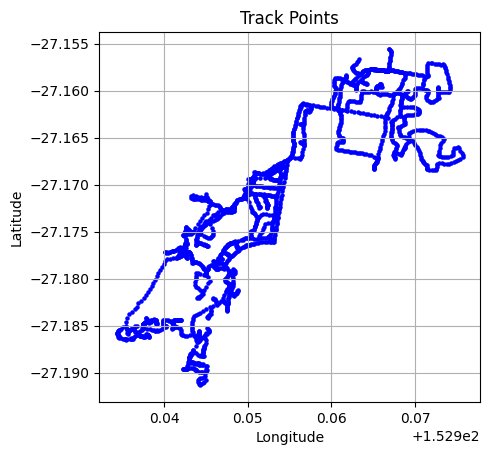

In [26]:
# Create a plot of the tracks_points
filtered_tracks_points.plot(marker='o', color='blue', markersize=5)

# Add title and labels
plt.title("Track Points")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()
